In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('zomato.csv',encoding='latin-1')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.describe()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
df['Cuisines'].isnull().sum()

9

In [8]:
[feature for feature in df.columns if df[feature].isnull().sum()>0]

['Cuisines']

<AxesSubplot:>

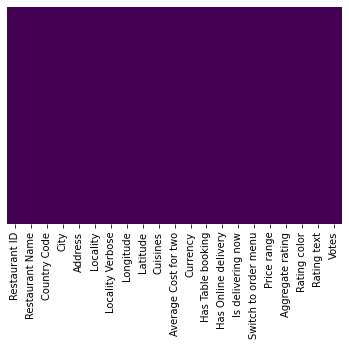

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap= 'viridis')

In [10]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [11]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [12]:
final_df=pd.merge(df,df_country,on = 'Country Code' , how = 'left')

In [13]:
country_names= final_df.Country.value_counts().index

In [14]:
country_values = final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x1bc446ca460>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.4%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.7%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.9%')])

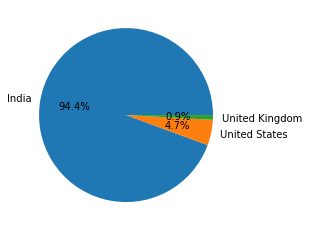

In [15]:
plt.pie(country_values[:3],labels = country_names[:3],autopct ='%1.1f%%')

Observation :
    Maximum records of zomato are fro
    m India, USA and then UK

In [16]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [17]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns= {0: "Rating Count"})

In [56]:
ratings['Rating color'].size

33

 OBS :Maximum people have not voted.
      

In [19]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12,6)


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

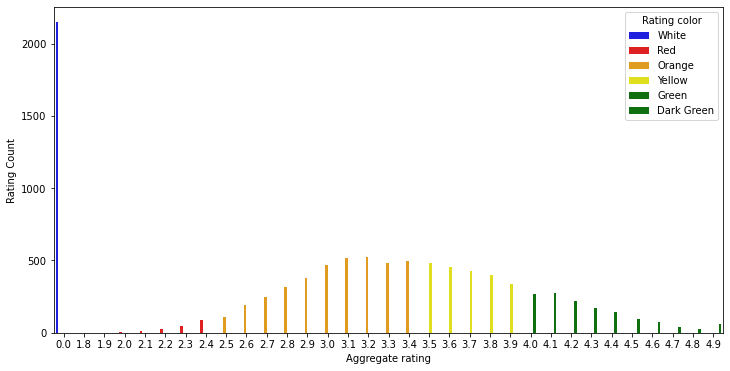

In [26]:
sns.barplot(x='Aggregate rating',y='Rating Count',hue = 'Rating color',data=ratings,palette=['blue', 'red', 'orange', 'yellow', 'green', 'green'])

OBS :

 Max ratings are between 2.5 to 3.6

<AxesSubplot:xlabel='Rating color', ylabel='count'>

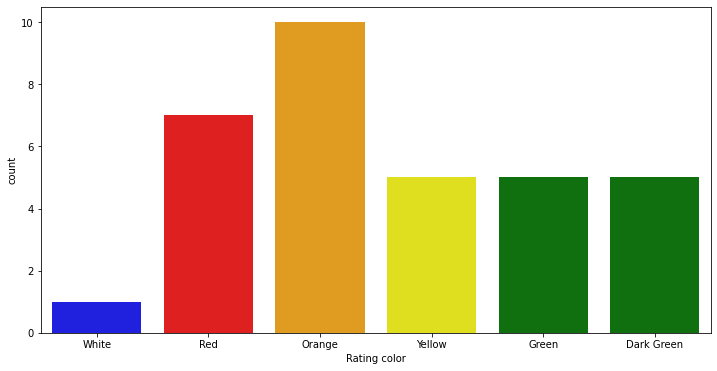

In [27]:
sns.countplot(x='Rating color',data=ratings,palette = ['blue', 'red', 'orange', 'yellow', 'green', 'green'] )

TO find what all countries gave 0 ratings

In [57]:
 final_df[final_df['Rating color'] == 'White' ].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [62]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1
...,...,...,...
217,4.9,Sri Lanka,1
218,4.9,Turkey,3
219,4.9,UAE,4
220,4.9,United Kingdom,4


OBS : Maximum no. of zero ratings were given by Indians

TO FIND WHICH CURRENCY IS USED BY WHICH COUNTRY

In [63]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [75]:
final_df.groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


WHICH COUNTRIES DO HAVE ONLINE DELIVERY OPTION

One way to do it

In [97]:
final_df[final_df['Has Online delivery'] == 'Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

Second way is to use groupby func

In [102]:
final_df[final_df['Has Online delivery'] == 'Yes'].groupby('Country').size().reset_index()

,Country,0
0,India,2423
1,UAE,28


OBS :

Online deliveries exits only in India and UAE

CREAT A PIE CHART FOR CITIES DISTRIBUTION

In [103]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [109]:
city_names =final_df.City.value_counts().index

In [110]:
city_values = final_df.City.value_counts().values

([<matplotlib.patches.Wedge at 0x1bc47b40d00>,
 [Text(-0.6207499702746028, 0.9081131396495042, 'New Delhi'),
  Text(0.07888824382658387, -1.0971675555656746, 'Gurgaon'),
  Text(0.8905335390443715, -0.6457166683903298, 'Noida'),
  Text(1.0945551812130687, -0.10931127700117002, 'Faridabad')],
 [Text(-0.338590892877056, 0.4953344398088204, '69.1%'),
  Text(0.043029951178136655, -0.5984550303085497, '14.1%'),
  Text(0.4857455667514753, -0.35220909184927074, '13.6%'),
  Text(0.597030098843492, -0.05962433290972909, '3.2%')])

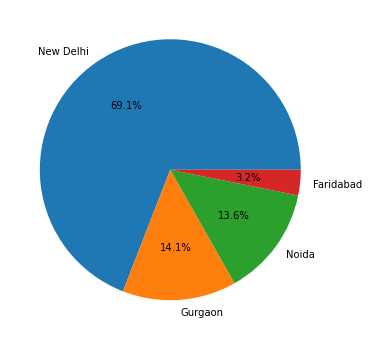

In [113]:
plt.pie(city_values[:4],labels = city_names[:4],autopct ='%1.1f%%')

Maximum orders from NEw Delhi

TO FIND TOP 10 CUISINES

In [122]:
cuisine_names = final_df.Cuisines.value_counts().index
cuisine_values = final_df.Cuisines.value_counts().values

([<matplotlib.patches.Wedge at 0x1bc47c17310>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Chinese'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Fast Food'),
  Text(-0.5935788454809928, -0.9261015895664211, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.6%'),
  Text(-0.316073417140361, 0.5099976421290743, '14.5%'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.1%'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.1%'),
  Text(-0.32377027935326874, -0.5051463215816842

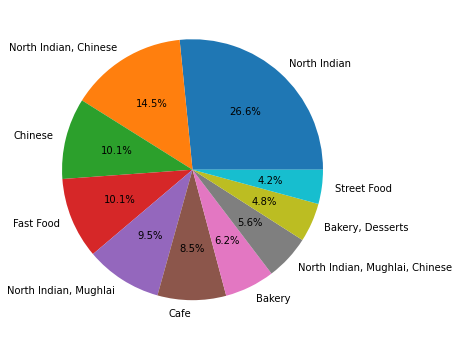

In [124]:
plt.pie(cuisine_values[:10],labels = cuisine_names[:10],autopct ='%1.1f%%')

In [126]:
final_df.Cuisines.value_counts()

North Indian                                                   936
North Indian, Chinese                                          511
Chinese                                                        354
Fast Food                                                      354
North Indian, Mughlai                                          334
                                                              ... 
Continental, American, Italian, North Indian, Chinese, Cafe      1
Cafe, Lebanese, Italian                                          1
North Indian, Chinese, Mughlai, Italian                          1
Cafe, Italian, Mexican, Chinese, North Indian                    1
Italian, Continental, Mexican, Lebanese                          1
Name: Cuisines, Length: 1825, dtype: int64